In [190]:
import pandas as pd
import re as re
import html

In [191]:
thread_df=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Threads.xlsx")

In [192]:
incident_df=pd.read_excel("C:\\Users\\tarun\\Downloads\\Sample Data\\Sample Data\\Incidents.xlsx")

In [193]:
thread_df.shape

(100001, 12)

In [194]:
incident_df.shape

(19409, 13)

In [195]:
thread_df.head()

,Threads,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer


In [196]:
incident_df.head()

,Incidents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value


In [197]:
header_row=0
thread_df.columns = thread_df.iloc[header_row]
incident_df.columns = incident_df.iloc[header_row]
thread_df=thread_df.drop(header_row)
incident_df=incident_df.drop(header_row)

In [198]:
thread_df.head()

,Foreign Key,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [199]:
incident_df.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,Category ID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [200]:
thread_df.rename(columns={'Foreign Key':'Incident ID'}, inplace=True)
incident_df.rename(columns={'Category ID':'CategoryID'}, inplace=True)

In [201]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [202]:
thread_df["Text"]=thread_df["Text"].apply(lambda cw: remove_tags(cw))

In [203]:
thread_df.head()

,Incident ID,Incident Thread ID,Account,Attributes,Date Created,Contact ID,Channel ID,Email Header,Sequence,SmartSense Indicator,Text,Thread Entry Type
1,2601,2773,No Value,No Value,04/10/2010 09:22,402,MA Email,No Value,1,0,\n\n==================== text File Attachment ...,Customer
2,2632,2809,No Value,No Value,05/11/2010 09:50,1983,CSS Web,No Value,1,5,Agents are experiencing an issue with Rightnow...,Customer
3,2601,2839,Stephen Pickett,No Value,11/01/2011 11:58,0,No Value,No Value,1,0,"Ad, see the attachment.",Note
4,2655,2842,No Value,No Value,12/01/2011 10:36,1243,CSS Web,No Value,1,-2,the phone display states \nNo service\nTrying ...,Customer
5,2655,2843,Alan Cheng,No Value,12/01/2011 11:02,0,Email,No Value,1,-48,"Had a look, appears to be a network port issue...",Staff Account


In [204]:
incident_df.head()

,Reference #,Incident ID,Assigned Account,Severity,Status,Status Type,Subject,Product ID,Organisation ID,Date Closed,Date Created,Contact ID,CategoryID
1,100825-000001,2554,Stephen Pickett,No Value,Solved,Solved,A4e Professional Services work,No Value,1,25/08/2010 12:00,25/08/2010 12:00,573,No Value
2,101004-000000,2601,Adam Wilkinson,No Value,Solved,Solved,Measuring effectiveness increases effectiveness,No Value,29,11/01/2011 12:07,04/10/2010 09:22,402,No Value
3,101102-000000,2619,Stephen Pickett,No Value,Solved,Solved,Infoco Answer Export Tool,RightNow,560,02/11/2010 12:05,02/11/2010 12:05,2157,No Value
4,101102-000001,2620,Chris Farmer,Medium,Solved,Solved,THA: The Family Information Direct/Helplines S...,No Value,562,24/02/2011 13:56,02/11/2010 12:46,2144,No Value
5,101105-000000,2632,Alan Cheng,Medium,Solved,Solved,incident screen freezing incident - Ref 100924...,Instance Freezing,473,16/02/2011 15:09,05/11/2010 09:50,1983,No Value


In [205]:
incident_df.CategoryID.unique()

array(['No Value', 'Update process', 'Oracle', 'Sharepoint',
       'Infrastructure', 'Telephony', 'Business Process', 'Contract',
       'CiviCRM', 'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [206]:
thread_df['Text']=thread_df['Text'].str.replace('\n','').str.replace('=','')

In [207]:
inc_thread_df=thread_df[["Incident ID","Text"]].merge(incident_df[["Incident ID","Status","Subject","CategoryID"]],on="Incident ID",how="right")

In [208]:
inc_thread_df.head(20)

,Incident ID,Text,Status,Subject,CategoryID
0,2601.0,"text File Attachment Attachment 1.txt, 6224 b...",Solved,Measuring effectiveness increases effectiveness,No Value
1,2601.0,"Ad, see the attachment.",Solved,Measuring effectiveness increases effectiveness,No Value
2,2632.0,Agents are experiencing an issue with Rightnow...,Solved,incident screen freezing incident - Ref 100924...,No Value
3,2632.0,Emailed agents this week asking if anyone have...,Solved,incident screen freezing incident - Ref 100924...,No Value
4,2632.0,No one have supplied details of issue,Solved,incident screen freezing incident - Ref 100924...,No Value
5,2655.0,the phone display states No serviceTrying 10.1...,Solved,Phone on Mandy's desk not working,No Value
6,2655.0,"Had a look, appears to be a network port issue...",Solved,Phone on Mandy's desk not working,No Value
7,2666.0,I have come into work this evening to find tha...,Solved,No Access to Rightnow on my computer,No Value
8,2666.0,"Hi Paddy,I've called you a number of times on ...",Solved,No Access to Rightnow on my computer,No Value
9,2666.0,"Hi Steve, It’s all been sorted out with Alan’s...",Solved,No Access to Rightnow on my computer,No Value


In [209]:
inc_thread_df['Text'] = inc_thread_df.groupby(['Incident ID'])['Text'].transform(lambda x : ''.join(str(x)))

In [210]:
inc_thread_df = inc_thread_df.drop_duplicates()

In [211]:
inc_thread_df["Text"]=inc_thread_df["Subject"]+" "+inc_thread_df["Text"]

In [212]:
inc_thread_df['Text'][2]

'incident screen freezing incident - Ref 100924-000040 2    Agents are experiencing an issue with Rightnow...\n3    Emailed agents this week asking if anyone have...\n4                No one have supplied details of issue\nName: 2632.0, dtype: object'

In [213]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID
0,2601.0,Measuring effectiveness increases effectivenes...,Solved,Measuring effectiveness increases effectiveness,No Value
2,2632.0,incident screen freezing incident - Ref 100924...,Solved,incident screen freezing incident - Ref 100924...,No Value
5,2655.0,Phone on Mandy's desk not working 5 the pho...,Solved,Phone on Mandy's desk not working,No Value
7,2666.0,No Access to Rightnow on my computer 7 I h...,Solved,No Access to Rightnow on my computer,No Value
11,2669.0,"BTB Right Now 11 Hiya, Can you re-install B...",Solved,BTB Right Now,No Value
13,2670.0,Laptop Cal019 13 I am still unable to hear ...,Solved,Laptop Cal019,No Value
17,2672.0,Outlook 17 can you install outlook for me p...,Solved,Outlook,No Value
19,2673.0,"Shoreware Agent manager 19 Hiya, Shoreware ...",Solved,Shoreware Agent manager,No Value
21,2674.0,Patrick has an issue logging in to CASupport 2...,Solved,Patrick has an issue logging in to CASupport,No Value
23,2675.0,Phone Recorder not working 23 Joanne Gauntl...,Solved,Phone Recorder not working,No Value


In [214]:
inc_thread_df.shape

(19408, 5)

In [215]:
inc_thread_df.CategoryID.unique()

array(['No Value', 'Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Update process', 'Business Process', 'Contract', 'CiviCRM',
       'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [216]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID
0,2601.0,Measuring effectiveness increases effectivenes...,Solved,Measuring effectiveness increases effectiveness,No Value
2,2632.0,incident screen freezing incident - Ref 100924...,Solved,incident screen freezing incident - Ref 100924...,No Value
5,2655.0,Phone on Mandy's desk not working 5 the pho...,Solved,Phone on Mandy's desk not working,No Value
7,2666.0,No Access to Rightnow on my computer 7 I h...,Solved,No Access to Rightnow on my computer,No Value
11,2669.0,"BTB Right Now 11 Hiya, Can you re-install B...",Solved,BTB Right Now,No Value
13,2670.0,Laptop Cal019 13 I am still unable to hear ...,Solved,Laptop Cal019,No Value
17,2672.0,Outlook 17 can you install outlook for me p...,Solved,Outlook,No Value
19,2673.0,"Shoreware Agent manager 19 Hiya, Shoreware ...",Solved,Shoreware Agent manager,No Value
21,2674.0,Patrick has an issue logging in to CASupport 2...,Solved,Patrick has an issue logging in to CASupport,No Value
23,2675.0,Phone Recorder not working 23 Joanne Gauntl...,Solved,Phone Recorder not working,No Value


In [217]:
null_columns=inc_thread_df.columns[inc_thread_df.isnull().any()]
inc_thread_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [218]:
inc_thread_df=inc_thread_df[inc_thread_df['CategoryID']!='No Value']

In [219]:
inc_thread_df.shape

(2414, 5)

In [220]:
inc_thread_df.CategoryID.unique()

array(['Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Update process', 'Business Process', 'Contract', 'CiviCRM',
       'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

In [221]:
inc_thread_df['Text']=inc_thread_df['Text'].str.replace('\n','').str.replace('.','')

In [222]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID
28234,11751.0,Email Verification 28234 Hi Mike As we dis...,Solved,Email Verification,Oracle
32278,12395.0,NWR: Customer portal re-design 32278 Our we...,Solved,NWR: Customer portal re-design,Oracle
33219,12528.0,UCU CP Law Extra and Future Status 33219 Mi...,Solved,UCU CP Law Extra and Future Status,Oracle
37312,13055.0,"Right Now - BDMA Tab Mail Merge 37312 Hi, ...",Solved,Right Now - BDMA Tab Mail Merge,Oracle
42809,13678.0,Mind - Legal SLA Report - CR - Amend Filters/S...,Solved,Mind - Legal SLA Report - CR - Amend Filters/S...,Oracle
43026,13702.0,CALM For CA Support 43026 We need to introd...,Solved,CALM For CA Support,Oracle
43926,13809.0,Change requirest for additional table and impo...,Solved,Change requirest for additional table and impo...,Oracle
43973,13811.0,Change the Country field in CABA workspace to ...,Solved,Change the Country field in CABA workspace to ...,Oracle
44141,13838.0,Wiltshire table added to CA support along with...,Solved,Wiltshire table added to CA support along with...,Oracle
44409,13866.0,CHANGE REQUEST - Flagging Contact & Incident R...,Solved,CHANGE REQUEST - Flagging Contact & Incident R...,Oracle


In [223]:
inc_thread_df['Text'][28234]

'Email Verification 28234    Hi Mike  As we discussed yesterday We wish to28235    Hi MikeThis one needs picking up please, Beth 28236    Response via E-mail:From: Mike Griffiths Sent:28237         Need to create a CR after speaking with Mike28238    Dear Joe,Thank you for contacting Connect Assi28239    Dear Joe,Thank you for contacting Connect Assi28240    Dear Joe,We are still awaiting an update from 28241    Dear Joe,Thank you for contacting Connect Assi28242    Dear Joe,We are still awaiting an update from 28243    Dear Joe,Thank you for contacting Connect Assi28244    Dear Joe,We are still awaiting an update from 28245    Dear Joe,We are still awaiting an update from 28246    Dear Joe,We are still awaiting an update from 28247    Dear Joe,We are still awaiting an update from 28248    Dear Joe,We are still awaiting an update from 28249    Dear Joe,We are still awaiting an update from 28250    Call Joe today,I advised that we need informat28251    Dear Joe,Thank you for contacting 

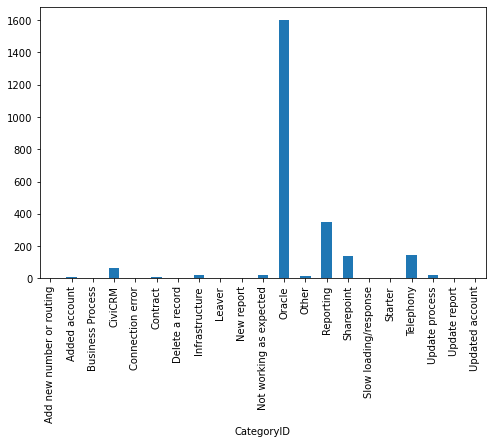

In [224]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
inc_thread_df.groupby('CategoryID').Text.count().plot.bar(ylim=0)
plt.show()

In [225]:
inc_thread_df = inc_thread_df[inc_thread_df['Text'].notna()]

In [226]:
inc_thread_df.shape

(2414, 5)

In [227]:
inc_thread_df.CategoryID.unique()

array(['Oracle', 'Sharepoint', 'Infrastructure', 'Telephony',
       'Update process', 'Business Process', 'Contract', 'CiviCRM',
       'Reporting', 'Not working as expected', 'Added account',
       'Updated account', 'Leaver', 'Starter', 'Update report', 'Other',
       'Slow loading/response', 'Delete a record',
       'Add new number or routing', 'New report', 'Connection error'],
      dtype=object)

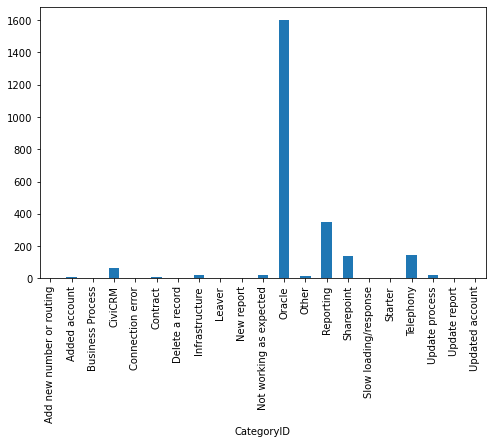

In [228]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
inc_thread_df.groupby('CategoryID').Text.count().plot.bar(ylim=0)
plt.show()

In [229]:
def decode_text(string):
    result = html.unescape(string)
    return result

In [230]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: decode_text(cw))

In [231]:
inc_thread_df['Text'] = inc_thread_df['Text'].replace(r'https?:\/\/.\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [232]:
inc_thread_df["Text"]=inc_thread_df["Text"].str.lower()

In [233]:
inc_thread_df["Text"]=inc_thread_df["Text"].str.replace('dtype','').str.replace('nanname','').str.replace('hi','')

In [234]:
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
def contraction_text(string):
    for key,value in Apos_dict.items():
        if key in string:
            result=string.replace(key,value)
            return result
        else:
            return string

In [235]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: contraction_text(cw))

In [236]:
def punction_text(string):
    result = re.sub(r'[^\w\s]', '', string)
    return result

In [237]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: punction_text(cw))

In [238]:
pattern = r'[0-9]'
def nums_text(string):
    result=re.sub(pattern, '', string)
    return result

In [239]:
inc_thread_df["Text"]=inc_thread_df["Text"].apply(lambda cw: nums_text(cw))

In [249]:
f1.describe()

count      2414
unique        2
top       False
freq       2410
Name: CategoryID, dtype: object

In [240]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [241]:
inc_thread_df['cat_id'] = inc_thread_df['CategoryID'].factorize()[0]
category_id_f2 = inc_thread_df[['CategoryID', 'cat_id']].drop_duplicates()

cat_to_id = dict(category_id_f2.values)
id_to_category = dict(category_id_f2[['cat_id', 'CategoryID']].values)

In [242]:
inc_thread_df.head(10)

,Incident ID,Text,Status,Subject,CategoryID,cat_id
28234,11751.0,email verification mike as we discussed ...,Solved,Email Verification,Oracle,0
32278,12395.0,nwr customer portal redesign our website ...,Solved,NWR: Customer portal re-design,Oracle,0
33219,12528.0,ucu cp law extra and future status michael...,Solved,UCU CP Law Extra and Future Status,Oracle,0
37312,13055.0,right now bdma tab mail merge i need to...,Solved,Right Now - BDMA Tab Mail Merge,Oracle,0
42809,13678.0,mind legal sla report cr amend filterssla c...,Solved,Mind - Legal SLA Report - CR - Amend Filters/S...,Oracle,0
43026,13702.0,calm for ca support we need to introduce c...,Solved,CALM For CA Support,Oracle,0
43926,13809.0,change requirest for additional table and impo...,Solved,Change requirest for additional table and impo...,Oracle,0
43973,13811.0,change the country field in caba workspace to ...,Solved,Change the Country field in CABA workspace to ...,Oracle,0
44141,13838.0,wiltsre table added to ca support along with a...,Solved,Wiltshire table added to CA support along with...,Oracle,0
44409,13866.0,change request flagging contact incident rec...,Solved,CHANGE REQUEST - Flagging Contact & Incident R...,Oracle,0


In [243]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(inc_thread_df.Text)

labels = inc_thread_df.cat_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2414 complaints is represented by 2303 features (TF-IDF score of unigrams and bigrams)


In [244]:
N = 3
for CategoryID, cat_id in sorted(cat_to_id.items()):
    features_chi = chi2(features, labels == cat_id)
    indices = np.argsort(features_chi[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(CategoryID))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Add new number or routing:
  * Most Correlated Unigrams are: object, cr, test
  * Most Correlated Bigrams are: new starter, cr object, test object

==> Added account:
  * Most Correlated Unigrams are: ukvi, creation, contacts
  * Most Correlated Bigrams are: oracle object, account object, oracle access

==> Business Process:
  * Most Correlated Unigrams are: schedule, scheduled, repor
  * Most Correlated Bigrams are: email attached, paul maksimovic, rach ts

==> CiviCRM:
  * Most Correlated Unigrams are: civi, shaw, healthcare
  * Most Correlated Bigrams are: healthcare crm, civi crm, shaw healthcare

==> Connection error:
  * Most Correlated Unigrams are: support, test, testing
  * Most Correlated Bigrams are: new starter, test object, support object

==> Contract:
  * Most Correlated Unigrams are: cust, ctcould, christmas
  * Most Correlated Bigrams are: user request, issues headset, discussed ts

==> Delete a record:
  * Most Correlated Unigrams are: ts, object, sla
  * Most Co

In [252]:
X=inc_thread_df['Text']
y=inc_thread_df['CategoryID']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

In [254]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    svm.SVC()
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\tarun\anaconda3\lib\site-packages\s

In [255]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.753948,0.023707
LogisticRegression,0.756013,0.019347
MultinomialNB,0.736546,0.020845
RandomForestClassifier,0.665700,0.001047
SVC,0.756430,0.020405


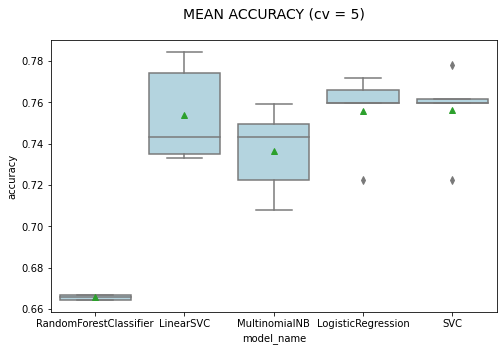

In [256]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [258]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               inc_thread_df.index, test_size=0.2, 
                                                               random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [259]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       325
           1       0.86      0.23      0.36        26
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       1.00      0.20      0.33        15
           8       0.92      0.64      0.76        73
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy                           0.78       483
   macro avg       0.24      0.14      0.15       4

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [260]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               inc_thread_df.index, test_size=0.2, 
                                                               random_state=42)
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [261]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       325
           1       0.88      0.27      0.41        26
           2       0.00      0.00      0.00         2
           3       1.00      0.04      0.07        26
           4       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         1
           7       1.00      0.27      0.42        15
           8       0.93      0.70      0.80        73
           9       0.33      0.50      0.40         2
          10       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy                           0.80       483
   macro avg       0.39      0.20      0.23       4

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

In [264]:
new_complaint = """Good morning,I have been locked out of my Right Now account, please can you assist?Many thanksHelenHelen TesterWellbeing CoordinatorPharmacist Support5th Floor196 DeansgateManchesterM3 3WFDirect: 0161 441 0811Enquiry Line: 0808 168 2233Website: www.pharmacistsupport.org<http://www.pharmacistsupport.org/>NEW Charity Number:Pharmacist Support is a charitable company limited by guarantee registered in England and Wales with company number 9237609 and charity number 1158974."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Oracle']


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = svm.SVC().fit(tfidf_vectorizer_vectors, y_train)

In [266]:
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Oracle']
